# **Kelompok 5**
**Jumlah Kasus DBD Bulanan**

1. Syifa Putri Fadhilla - 1305210084
2. Nakhwa Azizah - 1305213023
3. Siti Sulistyani Muhibbah - 1305213029

**Tugas 2 - Analisis Deret Waktu**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox, levene
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from scipy.stats import t
from statsmodels.tsa.arima.model import ARIMA

# **DATASET**

Data yang kami miliki yaitu Jumlah Kasus DBD Bulanan. Data yang akan diolah terdapat 2 atribut yaitu Waktu(bulan) dan Jumlah kasus DBD per-bulan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Info dataset**

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Data Jumlah Kasus DBD Bulanan.xlsx', index_col=0)
df

,Jumlah Kasus DBD
Waktu (Bulanan),
1,106
2,170
3,185
4,67
5,89
...,...
146,67
147,105
148,100


# **PLOT DATA**

Proses visualisasi data dengan menggambarkan plot data. Plot data membantu analisis untuk memahami plot dan karaktersitik data.

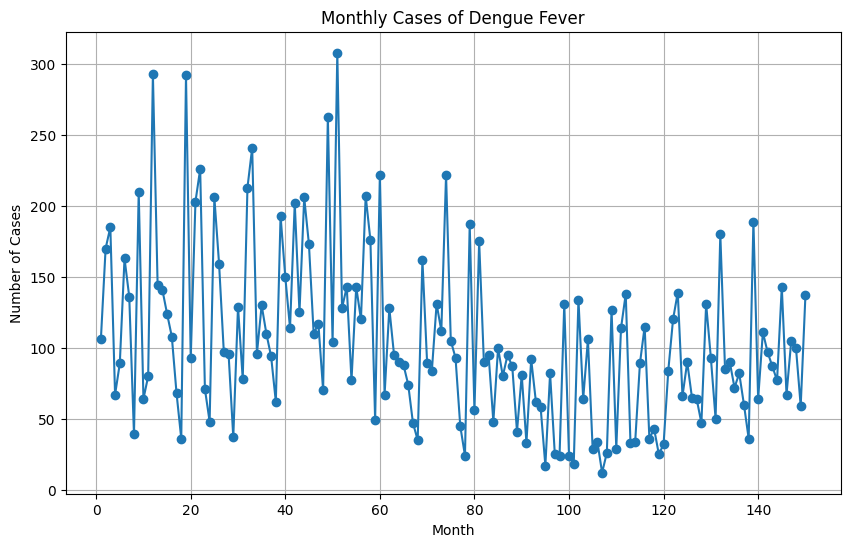

In [ ]:
# Line plot using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Jumlah Kasus DBD'], marker='o', linestyle='-')
plt.title('Monthly Cases of Dengue Fever')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show()

Hasil : Plot Data diatas menunjukkan data "Jumlah Kasus DBD Bulanan" tidak stasioner, terlihat bahwa fluktuasi yang tidak konsisten atau berubah seiring waktu.

 # **PERIKSA KESTASIONERAN DATA TERHADAP VARIANSI (Box-Cox)**

Box-Cox adalah metode transformasi yang digunakan untuk mengatasi ketidakstasioneran terhadap varians dalam suatu dataset. Metode ini menggunakan nilai lambda (λ) sebagai parameter transformasi untuk menciptakan homoskedastisitas, yaitu membuat varians data menjadi lebih konstan. Dengan memilih nilai lambda yang sesuai, transformasi Box-Cox dapat membawa data yang tidak stasioner terhadap variansi menjadi lebih stasioner, memenuhi asumsi-asumsi yang diperlukan dalam analisis statistik,


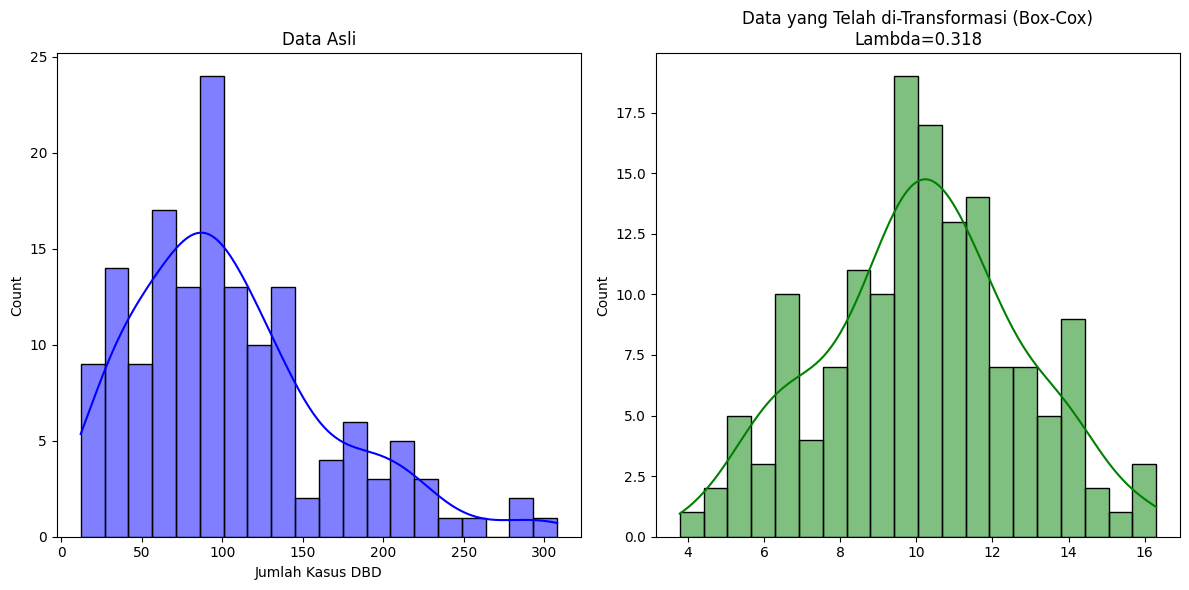

Statistik Uji Levene: 165.50362970772915
Nilai p: 2.0036741416733252e-30
Nilai p < 0.05: Data yang telah di-transformasi memiliki varians yang tidak sama.
Lambda value used for Transformation: 0.3179185853788799


In [ ]:
# Transformasi Box-Cox
data_transformed, nilai_lambda = boxcox(df['Jumlah Kasus DBD'])

# Plotting histogram untuk data asli dan data yang telah di-transformasi
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Jumlah Kasus DBD'], bins=20, kde=True, color='blue')
plt.title('Data Asli')

plt.subplot(1, 2, 2)
sns.histplot(data_transformed, bins=20, kde=True, color='green')
plt.title(f'Data yang Telah di-Transformasi (Box-Cox)\nLambda={nilai_lambda:.3f}')  # Menambahkan nilai lambda ke judul

plt.tight_layout()
plt.show()

# Lakukan uji Levene untuk homogenitas varians
statistik_uji_levene, nilai_p_uji_levene = levene(df['Jumlah Kasus DBD'], data_transformed)
print('Statistik Uji Levene:', statistik_uji_levene)
print('Nilai p:', nilai_p_uji_levene)

# Interpretasi uji Levene
if nilai_p_uji_levene < 0.05:
    print('Nilai p < 0.05: Data yang telah di-transformasi memiliki varians yang tidak sama.')
else:
    print('Nilai p >= 0.05: Data yang telah di-transformasi memiliki varians yang sama.')

print('Lambda value used for Transformation:', nilai_lambda)

Hasil menunjukkan nilai λ sebesar 0.3179. Uji ini menunjukkan perbedaan variansi antara data asli dan data yang telah ditransformasi tetap signifikan.


Nilai p < 0.05: Data yang telah di-transformasi memiliki varians yang tidak sama.

# **PERIKSA KESTASIONERAN DATA TERHADAP MEAN (UJI ADF)**


Jika nilai p-value ≤ 0.05 (nilai ambang batas yang umum digunakan) maka data dianggap stasioner.
Jika nilainya p-value > 0.05 maka data dianggap tidak stasioner.

In [ ]:
# Menggunakan kolom 'Jumlah Kasus' untuk uji ADF
data = df

# Melakukan uji ADF
result = adfuller(data)

# Menampilkan hasil uji ADF
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Optimal Number of Lags:', result[2])
print('Critical Values:')
# Nilai kritis dibutuhkan untuk membandingkan dengan nilai statistik ADF.

# loop untuk mencetak nilai-nilai kritis yang disimpan dalam result[4].
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Interpretasi hasil uji ADF
if result[1] < 0.05:
    print(f'P-Value ({result[1]}) < 0.05: Data tidak memiliki akar unit, data bersifat stasioner')
else:
    print(f'P-Value ({result[1]}) >= 0.05: Data memiliki akar unit, data bersifat tidak stasioner')


ADF Statistic: -1.5100605883281955
p-value: 0.5285287690772464
Optimal Number of Lags: 14
Critical Values:
   1%: -3.479742586699182
   5%: -2.88319822181578
   10%: -2.578319684499314
P-Value (0.5285287690772464) >= 0.05: Data memiliki akar unit, data bersifat tidak stasioner


Hasil : Berdasarkan Uji ADF diatas
nilai ADF statistic < critical value dan nilai p-value > 0.05, maka deret waktu tidak stasioner.

# **DIFFERENCING**

Defferencing adalah teknik analisis deret waktu yang melibatkan pengurangan nilai pada suatu observasi dengan nilai observasi sebelumnya.

Rumus Defferencing:

  - Differencing(lag k) = Yt - Yt-k

Karena data deret waktu tidak stasioner, kita melakukan diferencing untuk membuat data menjadi stasioner. Stasioner data memudahkan penerapan model statistik ARIMA(Autoregressive Itegrated Moving).

In [ ]:
# Mengubah data_transformed menjadi pandas Series
data_transformed_series = pd.Series(data_transformed)

# Differencing pada data yang telah di-transformasi
data_transformed_diff = data_transformed_series.diff().dropna()

# Uji ADF (Augmented Dickey-Fuller) pada data yang telah di-differencing
result_diff = adfuller(data_transformed_diff)
print('ADF Statistic:', result_diff[0])
print('p-value:', result_diff[1])

# Interpretasi hasil uji ADF differencing
if result_diff[1] < 0.05:
    print('P-Value < 0.05: Data yang telah di-differencing bersifat stasioner')
else:
    print('P-Value >= 0.05: Data yang telah di-differencing bersifat tidak stasioner')


ADF Statistic: -3.769124025834973
p-value: 0.003239493756104387
P-Value < 0.05: Data yang telah di-differencing bersifat stasioner


Hasil :
Berdasarkan UJI ADF setelah dilakukan differencing didapatkan bahwa
nilai ADF statistic < critical value dan nilai p-value < 0.05, maka data deret waktu sudah stasioner.

# **PLOT ACF DAN PACF**

Autocorrelation Fuction(ACF) dan Partial Autocorrelation Fuction(PACF) digunakan untuk memahami pola korelasi dalam data deret waktu, serta membantu dalam mengidentifikasi model statistik yang sesuai untuk menganalisis dan memptrediksi data deret waktu.
- ACF:
  Mengukur korelasi antara nilai suatu variabel dan nilai variabel pada lag waktu sebelumnya. Membantu mengukur korelasi secara umum
- PACF:
  Mengkur korelasi antara nilai suatu variabel dan nilai variabel pada lag waktu sebelumnya secara langsung setelah mengontrol efek dari lag-lag yang berada diantara keduanya.


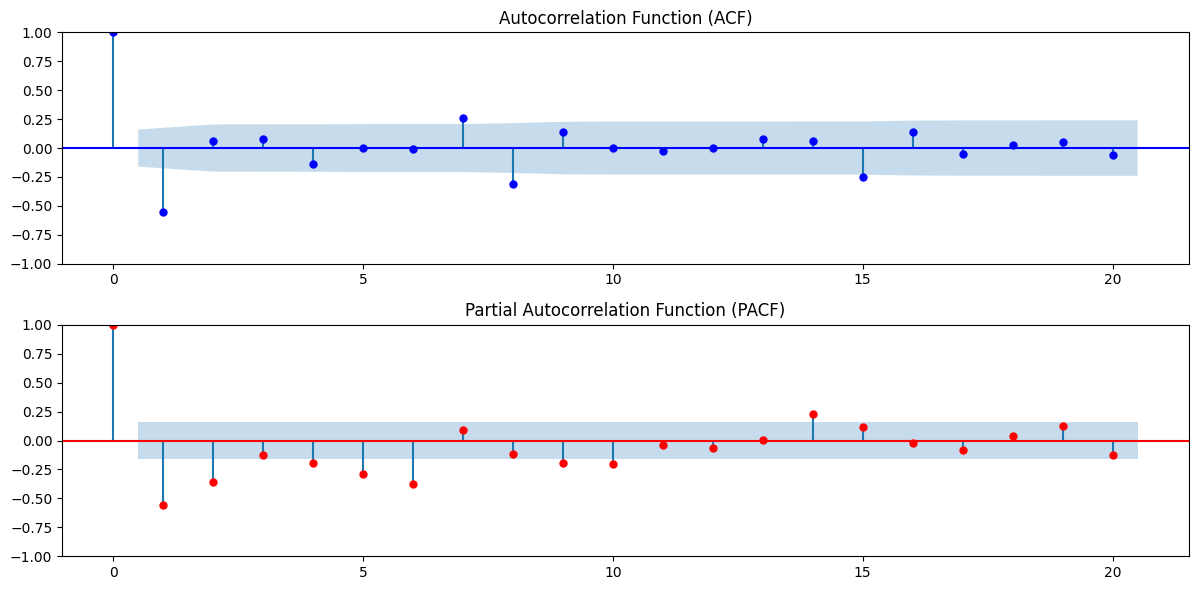

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF dan PACF
plt.figure(figsize=(12, 6))

# Plot ACF
plt.subplot(2, 1, 1)
plot_acf(data_transformed_diff, lags=20, ax=plt.gca(), color='blue')
plt.title('Autocorrelation Function (ACF)')

# Plot PACF
plt.subplot(2, 1, 2)
plot_pacf(data_transformed_diff, lags=20, ax=plt.gca(), color='red')
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import acf, pacf

# Menghitung ACF dan PACF
acf_vals = acf(data_transformed_diff, nlags=20)
pacf_vals = pacf(data_transformed_diff, nlags=20)

# Menentukan batas cut-off
batas_cut_off = 1.96 / len(data_transformed_diff) ** 0.5

# Identifikasi lag-lag yang melampaui batas cut-off pada ACF
cutoff_acf = [lag for lag in range(len(acf_vals)) if abs(acf_vals[lag]) > batas_cut_off]

# Identifikasi lag-lag yang melampaui batas cut-off pada PACF
cutoff_pacf = [lag for lag in range(len(pacf_vals)) if abs(pacf_vals[lag]) > batas_cut_off]

# Tampilkan hasil identifikasi
print('Lags yang melampaui batas cut-off pada ACF:', cutoff_acf)
print('Lags yang melampaui batas cut-off pada PACF:', cutoff_pacf)


Lags yang melampaui batas cut-off pada ACF: [0, 1, 7, 8, 15]
Lags yang melampaui batas cut-off pada PACF: [0, 1, 2, 4, 5, 6, 9, 10, 14, 19]


# **IDENTIFIKASI MODEL ARIMA(p,d,q)**

Model AR
- Bergantung pada nilai variabel pada lag-lag waktu sebelumnya
- Terdapat parameter autoregresive (p) yang menentukan jumlah lag.
  
Model MA
- Bergantung pada nilai residual(kesalahan prediksi) pada lag-lag waktu sebelumnya.
- Terdapat parameter moving average (q) yang menentukan jumlah lag residual.

Model ARIMA
- Kombinasi dari model AR dan model MA dengan tambahan komponen differencing.
- Terdapat parameter autoregresive(p), moving average(q), dan differencing(d)

Dari informasi ACF dan PACF, kita dapat memilih nilai yang mungkin untuk model ARIMA (p, d, q). Identifikasi ini melibatkan pengamatan pola dalam ACF dan PACF untuk menentukan nilai p (lag dalam model AR), d (tingkat differencing), dan q (lag dalam model MA). Prosedur ini membantu memahami struktur deret waktu dan memilih parameter yang paling sesuai untuk model ARIMA.


# **PEMILIHAN MODEL TERBAIK MENGGUNAKAN NILAI AIC**

Nilai AIC (Akaike Information Ceriterion) adalah ukuran evaluasi model statistik dengan mempertimbangkan model cocok dengan data dan kompleksitasnya.

Rumus AIC:
- AIC = −2 × ln(L) + 2 × k

Nilai AIC yang lebih rendah menunjukkan model yang lebih baik. Proses pemilihan model dengan AIC membantu menghindari overfitting dan mendukung generalisasi model ke data baru.

In [ ]:
best_aic = np.inf
best_order = None

p_values = [0, 1, 7, 8, 15]
d_values = 1
q_values = [0, 1, 2, 4, 5, 6, 9, 10, 14, 19]

for p in p_values:
    for q in q_values:
        order = (p, d_values, q)
        model = ARIMA(data_transformed_diff, order=order)  # Menggunakan data yang telah di-transformasi
        try:
            model_fit = model.fit()
            aic = model_fit.aic
            if aic < best_aic:
                best_aic = aic
                best_order = order
        except:
            continue

print('Model ARIMA terbaik:', best_order)
print('AIC terbaik:', best_aic)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

Model ARIMA terbaik: (15, 1, 5)
AIC terbaik: 665.3753371904395


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Hasil : didapatkan model ARIMA terbaik adalah (15,1,5), dan didapatkan nilai AIC terbaik adalah (665.3753)

- p (AR): 15, menandakan adanya ketergantungan pada 15 lag sebelumnya.
- d (Differencing) : 1, proses differencing diterapkan satu kali untuk membuat data menjadi stasioner.
- q (MA) : 5, menunjukkan adanya pengarih dari 5 lag.


# **ESTIMASI PARAMETER (MAXIMUM LIKELIHOOD), UJI SIGNIFIKANSI TERHADAP PARAMETER**

Estimasi parameter menggunakan metode Maximum Likelihood (ML) adalah pendekatan statistik yang mencari nilai-nilai parameter model yang memberikan kemungkinan tertinggi terhadap data observasi. Proses ini melibatkan pembentukan fungsi likelihood, pencarian nilai maksimum likelihood, dan penentuan nilai parameter model. Tujuan uji signifikansi terhadap parameter adalah untuk menilai apakah nilai-nilai parameter yang diestimasi berbeda secara signifikan dari nol. Ini dilakukan dengan menghitung statistik uji, nilai p, dan membuat keputusan berdasarkan tingkat signifikansi yang ditetapkan, sehingga memastikan bahwa parameter yang diestimasi memiliki dampak yang signifikan pada model statistik.

H0: Parameter model tidak signifikan, atau tidak berpengaruh terhadap variabel dependen.

H1: Parameter model signifikan, atau berpengaruh terhadap variabel dependen.

Taraf signifikan sebesar 5%, tolak H0 jika p-value < 0.05

Untuk melakukan estimasi parameter, kami menggunakan 2 model ARIMA dengan nilai AIC yang rendah. Setelah itu, dilakukan uji signifikansi terhadap parameter-parameter pada kedua model tersebut.

In [ ]:
best_aic = np.inf
best_order = None
second_best_aic = np.inf
second_best_order = None

p_values = [0, 1, 7, 8, 15]
d_values = 1
q_values = [0, 1, 2, 4, 5, 6, 9, 10, 14, 19]

for p in p_values:
    for q in q_values:
        order = (p, d_values, q)
        if order == (15, 1, 5):  # Skip the first-best model
            continue
        model = ARIMA(data_transformed_diff, order=order)
        try:
            model_fit = model.fit()
            aic = model_fit.aic
            if aic < best_aic:
                second_best_aic = best_aic
                second_best_order = best_order
                best_aic = aic
                best_order = order
            elif aic < second_best_aic:
                second_best_aic = aic
                second_best_order = order
        except:
            continue

print('Model ARIMA kedua terbaik:', second_best_order)
print('AIC kedua terbaik:', second_best_aic)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

Model ARIMA kedua terbaik: (8, 1, 14)
AIC kedua terbaik: 668.8901499461451


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Model ARIMA(15,1,5)
model_arima_1 = sm.tsa.ARIMA(data_transformed_diff, order=(15, 1, 5))
results_arima_1 = model_arima_1.fit()

# Model ARIMA(8,1,14)
model_arima_2 = sm.tsa.ARIMA(data_transformed_diff, order=(8, 1, 14))
results_arima_2 = model_arima_2.fit()

# Ekstrak nilai parameter
params_1 = results_arima_1.params
params_2 = results_arima_2.params

# Ekstrak kesalahan standar
std_errors_1 = results_arima_1.bse
std_errors_2 = results_arima_2.bse

# Jumlah observasi
n_obs = len(data_transformed_diff)

# Derajat kebebasan
df = n_obs - len(params_1)

# Nilai kritis dari distribusi t untuk taraf signifikansi 5%
t_critical = t.ppf(1 - 0.025, df)

# Uji signifikansi untuk model ARIMA(15,1,5)
print("Uji Signifikansi untuk Model ARIMA(15,1,5):")
for i, (param, std_error) in enumerate(zip(params_1, std_errors_1)):
    t_statistic = param / std_error
    p_value = 2 * (1 - t.cdf(np.abs(t_statistic), df))
    significant = "Signifikan" if np.abs(t_statistic) > t_critical else "Tidak Signifikan"

    print(f"Parameter {i + 1}: t-statistic = {t_statistic:.4f}, p-value = {p_value:.4f}, {significant}")

# Uji signifikansi untuk model ARIMA(8,1,14)
print("\nUji Signifikansi untuk Model ARIMA(8,1,14):")
for i, (param, std_error) in enumerate(zip(params_2, std_errors_2)):
    t_statistic = param / std_error
    p_value = 2 * (1 - t.cdf(np.abs(t_statistic), df))
    significant = "Signifikan" if np.abs(t_statistic) > t_critical else "Tidak Signifikan"

    print(f"Parameter {i + 1}: t-statistic = {t_statistic:.4f}, p-value = {p_value:.4f}, {significant}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  

Uji Signifikansi untuk Model ARIMA(15,1,5):
Parameter 1: t-statistic = -17.2185, p-value = 0.0000, Signifikan
Parameter 2: t-statistic = -9.6447, p-value = 0.0000, Signifikan
Parameter 3: t-statistic = -8.1730, p-value = 0.0000, Signifikan
Parameter 4: t-statistic = -7.8166, p-value = 0.0000, Signifikan
Parameter 5: t-statistic = -6.1540, p-value = 0.0000, Signifikan
Parameter 6: t-statistic = -4.7009, p-value = 0.0000, Signifikan
Parameter 7: t-statistic = -3.8845, p-value = 0.0002, Signifikan
Parameter 8: t-statistic = -3.5998, p-value = 0.0005, Signifikan
Parameter 9: t-statistic = -3.1686, p-value = 0.0019, Signifikan
Parameter 10: t-statistic = -2.4664, p-value = 0.0150, Signifikan
Parameter 11: t-statistic = -1.9380, p-value = 0.0548, Tidak Signifikan
Parameter 12: t-statistic = -1.9056, p-value = 0.0590, Tidak Signifikan
Parameter 13: t-statistic = -1.3670, p-value = 0.1740, Tidak Signifikan
Parameter 14: t-statistic = 0.0429, p-value = 0.9659, Tidak Signifikan
Parameter 15: t-s

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


- Model ARIMA(15, 1, 5) menunjukkan terdapat 10 parameter memiliki pengaruh signifikan secara statistik, sementara Model ARIMA(8, 1, 14) menunjukkan terdapat 8 parameter memiliki pengaruh signifikan secara statistik.
- Maka model ARIMA(15, 1, 5) lebih baik, karena meiliki parameter yang paling relevan dan signifikan yang lebih berpengaruh.

# **UJI KELAYAKAN MODEL (Ljung-Box)**

Uji kelayakan model menggunakan Ljung-Box digunakan untuk mengevaluasi apakah residual dari suatu model deret waktu memiliki autokorelasi yang signifikan pada beberapa lag waktu tertentu. Uji ini membantu menentukan apakah model telah berhasil menangkap pola-pola dalam data atau jika masih terdapat struktur autokorelasi pada residualnya.

Prosesnya melibatkan perhitungan statistik uji Ljung-Box pada beberapa lag waktu, diikuti dengan pengecekan nilai p untuk menentukan signifikansinya.

H0: Tidak ada autokorelasi pada lag tertentu (Ljung-Box Statistic tidak signifikan)

H1: Terdapat autokorelasi pada setidaknya satu lag (Ljung-Box Statistic signifikan)

Taraf signifikan sebesar 5%, tolak H0 jika p-value < 0.05

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Lakukan uji kelayakan Ljung-Box
residuals = results_arima_1.resid
ljung_box_results = acorr_ljungbox(residuals)

# Simpan hasil uji dalam DataFrame
ljung_box_df = pd.DataFrame({
    'Ljung-Box Statistic': ljung_box_results.lb_stat,
    'P-value': ljung_box_results.lb_pvalue
})

# Tampilkan DataFrame
print(ljung_box_df)

# Interpretasi hasil uji Ljung-Box
significance_level = 0.05

for lag, stat, p_value in zip(ljung_box_df.index + 1, ljung_box_df['Ljung-Box Statistic'], ljung_box_df['P-value']):
    print(f"Lag {lag-1}: Test Statistic = {stat:.4f}, P-value = {p_value:.4f}")
    if p_value < significance_level:
        print(f"Lag {lag-1} menunjukkan autokorelasi signifikan.")
    else:
        print(f"Lag {lag-1} tidak menunjukkan autokorelasi signifikan.")
    print()

# Kesimpulan
significant_lags = ljung_box_df[ljung_box_df['P-value'] < significance_level]
if not significant_lags.empty:
    print(f"Ada {len(significant_lags)} lag dengan autokorelasi signifikan.")
else:
    print("Tidak ada lag dengan autokorelasi signifikan.")

    Ljung-Box Statistic   P-value
1              0.002119  0.963282
2              0.731294  0.693748
3              0.742574  0.863147
4              0.923191  0.921210
5              1.098161  0.954266
6              1.262102  0.973706
7              1.330180  0.987614
8              1.331790  0.995161
9              1.463479  0.997409
10             1.529554  0.998840
Lag 1: Test Statistic = 0.0021, P-value = 0.9633
Lag 1 tidak menunjukkan autokorelasi signifikan.

Lag 2: Test Statistic = 0.7313, P-value = 0.6937
Lag 2 tidak menunjukkan autokorelasi signifikan.

Lag 3: Test Statistic = 0.7426, P-value = 0.8631
Lag 3 tidak menunjukkan autokorelasi signifikan.

Lag 4: Test Statistic = 0.9232, P-value = 0.9212
Lag 4 tidak menunjukkan autokorelasi signifikan.

Lag 5: Test Statistic = 1.0982, P-value = 0.9543
Lag 5 tidak menunjukkan autokorelasi signifikan.

Lag 6: Test Statistic = 1.2621, P-value = 0.9737
Lag 6 tidak menunjukkan autokorelasi signifikan.

Lag 7: Test Statistic = 1.3302, 


Hasil uji kelayakan model menggunakan Ljung-Box menunjukkan bahwa pada semua lag (Lag 1 hingga Lag 10), nilai p-value lebih besar dari tingkat signifikansi yang umumnya digunakan (0.05). Oleh karena itu, tidak ada cukup bukti untuk menolak hipotesis nol bahwa tidak ada autokorelasi yang signifikan pada residual pada lag-lag tersebut. Secara umum, ini mengindikasikan bahwa model ARIMA yang telah diestimasi berhasil menangkap pola autokorelasi dalam data dengan baik, dan residualnya terlihat tidak memiliki pola yang signifikan. Kesimpulannya, model ARIMA dengan parameter (15, 1, 5) terlihat memadai dalam mengatasi autokorelasi pada data deret waktu yang telah di-transformasi.

# **UJI KENORMALAN SISAAN (Shapiro-Wilks)**

Uji Kenormalan Sisaan menggunakan tes Shapiro-Wilks bertujuan untuk menilai apakah sisaan (residuals) dari model statistik mengikuti distribusi normal atau tidak. Uji ini memanfaatkan statistik uji Shapiro-Wilks yang mengukur sejauh mana distribusi sampel dapat dianggap sebagai distribusi normal.

H0 : Residual berdistribusi normal

H1 : Residual tidak berdistribusi normal

Taraf signifikan sebesar 5%, tolak H0 jika p-value >= 0,05



In [ ]:
from scipy.stats import shapiro

# Uji Shapiro-Wilk untuk Model ARIMA(15,1,5)
shapiro_statistic_1, shapiro_p_value_1 = shapiro(residuals)

print("Uji Shapiro-Wilk untuk Model ARIMA(15,1,5):")
print(f'Shapiro Statistic: {shapiro_statistic_1}')
print(f'P-value: {shapiro_p_value_1}')

# Interpretasi hasil uji Shapiro-Wilk
alpha = 0.05
if shapiro_p_value_1 < alpha:
    print('P-value < 0.05: Sisaan tidak terdistribusi normal.')
else:
    print('P-value >= 0.05: Tidak cukup bukti untuk menolak asumsi normalitas sisaan.')

Uji Shapiro-Wilk untuk Model ARIMA(15,1,5):
Shapiro Statistic: 0.9942747354507446
P-value: 0.8247420191764832
P-value >= 0.05: Tidak cukup bukti untuk menolak asumsi normalitas sisaan.


Berdasarkan hasil uji Shapiro-Wilk untuk Model ARIMA(15,1,5), model tersebut menunjukkan nilai P-value yang lebih besar dari tingkat signifikansi yang umumnya digunakan (0.05). Oleh karena itu, kita tidak memiliki cukup bukti untuk menolak asumsi bahwa sisaan (residuals) dari kedua model terdistribusi secara normal. Dengan kata lain, kita dapat menerima hipotesis nol (H0) yang menyatakan bahwa sisaan tersebut terdistribusi normal.

Secara umum, hasil ini menunjukkan bahwa sisaan dari kedua model ARIMA dapat dianggap terdistribusi normal, sehingga asumsi normalitas dalam analisis time series dapat dianggap terpenuhi.

# **FORECASTING DAN NILAI RMSE**

Menggunakan model ARIMA dengan parameter terbaik untuk melakukan forecasting terhadap data jumlah kasus DBD bulanan dan menghitung RMSE untuk menentukan seberapa baik model dapat memprediksi data yang belum terlihat.

Menampilkan grafik data dengan 80% data training, 20% data testing, dan data forcasted.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  

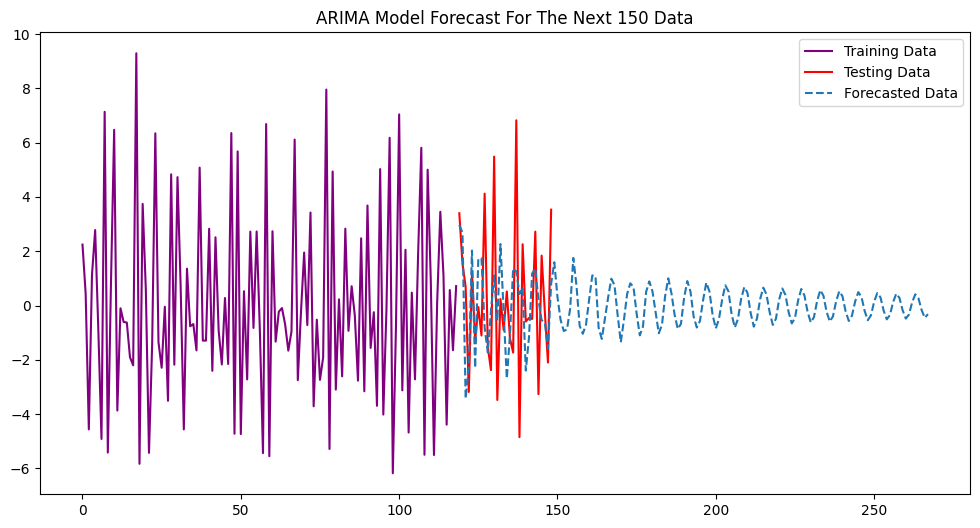


Forecasted Values:
119    2.971686
120    2.678515
121   -3.425326
122   -2.287624
123    2.025593
124   -2.300005
125    1.713383
126    1.747088
127   -0.813166
128   -1.731140
129   -0.193580
130    1.111217
131   -0.555217
132    2.264058
133   -0.236593
134   -2.695768
135   -1.079203
136    1.364047
137    1.253910
138    0.424722
139    0.661475
140   -2.395567
141   -1.183550
142    1.179622
143    1.364425
144    0.204418
145   -0.541480
146   -0.624869
147   -1.586226
148    0.804177
Name: predicted_mean, dtype: float64

Forecast RMSE: 2.6381236614151073


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Best ARIMA order obtained from previous analysis
best_order = (15, 1, 5)

# Split the data into training and testing sets
train_size = int(len(data_transformed_diff) * 0.8)
train, test = data_transformed_diff[:train_size], data_transformed_diff[train_size:]

# Create and train the ARIMA model with the best order
model = ARIMA(train, order=best_order)
model_fit = model.fit()

# Forecasting for the next 5 months (assuming monthly data)
n_steps = len(data_transformed_diff)  # Adjust if your data has a different frequency
predictions = model_fit.forecast(steps=n_steps)

# Plot the results
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(range(train_size), train, label='Training Data', linestyle='-', color='purple')

# Plot testing data
plt.plot(range(train_size, len(data_transformed_diff)), test, label='Testing Data', linestyle='-', color='red')

# Plot forecasted data
plt.plot(range(train_size, train_size + n_steps), predictions, label='Forecasted Data', linestyle='--')

plt.title('ARIMA Model Forecast For The Next 150 Data')
plt.legend()
plt.show()

# Extract forecasted values and print them
forecast_values = predictions[:len(test)]
print('\nForecasted Values:')
print(forecast_values)

# Calculate RMSE for the forecasted data
forecast_rmse = sqrt(mean_squared_error(test, forecast_values))
print('\nForecast RMSE:', forecast_rmse)


Grafik menunjukkan data historis dan hasil peramalan untuk setelah 150 bulan data. Grafik menunjukkan sejauh mana model dapat menangkap tren dan pola dalam data sebenarnya.

Dengan nilai RMSE sebesar 2.6381236614151073, dapat disimpulkan bahwa model ARIMA(15,1,5) mampu memberikan peramalan yang relatif akurat berdasarkan data yang telah diuji.

# **KESIMPULAN**

Melalui analisis terhadap data "Jumlah Kasus DBD Bulanan," berhasil mengatasi ketidakstasioneran melalui penerapan transformasi Box-Cox dan proses differencing. Model ARIMA(15, 1, 5) yang dihasilkan bukan hanya mampu secara efektif memprediksi tren kasus DBD bulanan, namun juga teruji kehandalannya melalui estimasi parameter menggunakan metode Maximum Likelihood (ML).

Hasil uji kelayakan model dan uji kenormalan sisaan memberikan konfirmasi terhadap ketepatan dan keandalan model ini. Dengan nilai RMSE yang memuaskan, kesimpulan yang dapat diambil adalah bahwa model ini efektif dalam memberikan gambaran yang dapat diandalkan terkait perkembangan kasus DBD.